# Task 1- Stock Prediction :

##### Take stock price of any company youwant and predicts its price by using LSTM.

#### Importing important Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler

#### Load the Dataset

In [6]:
df=pd.read_csv(r"C:\Users\Lenovo\Downloads\archive (3)\Tesla Stock Price (2010 to 2023).csv")

In [7]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,29/06/2010,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,30/06/2010,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,01/07/2010,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,02/07/2010,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,06/07/2010,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3157,12/01/2023,122.559998,124.129997,117.000000,123.559998,123.559998,169400900
3158,13/01/2023,116.550003,122.629997,115.599998,122.400002,122.400002,180439300
3159,17/01/2023,125.699997,131.699997,125.019997,131.490005,131.490005,186477000
3160,18/01/2023,136.559998,136.679993,127.010002,128.779999,128.779999,195680300


In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29/06/2010,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,30/06/2010,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,01/07/2010,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,02/07/2010,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,06/07/2010,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [9]:
df.shape

(3162, 7)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3162 entries, 0 to 3161
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3162 non-null   object 
 1   Open       3162 non-null   float64
 2   High       3162 non-null   float64
 3   Low        3162 non-null   float64
 4   Close      3162 non-null   float64
 5   Adj Close  3162 non-null   float64
 6   Volume     3162 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 173.0+ KB


#### Ploting the closing price of the stock to visualize the trend

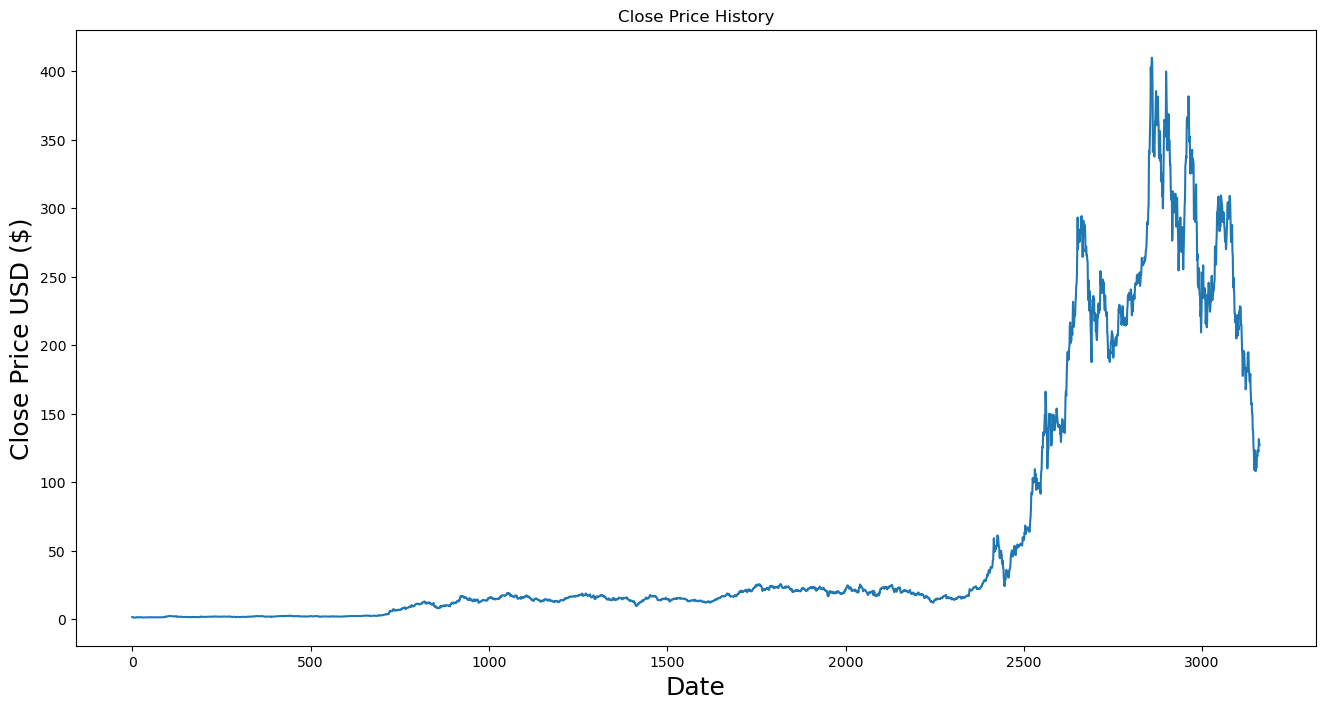

In [11]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

#### we need to preprocess the data before feeding it into the LSTM.

In [12]:
data = df.filter(['Close']).values

#### we will normalize the data between 0 and 1 using the MinMaxScaler:

In [13]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

#### To Train the Dataset

In [14]:
train_data = scaled_data[:int(len(scaled_data)*0.8)]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

#### Build the LSTM model

In [15]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
78/78 [==============================] - 21s 110ms/step - loss: 2.3723e-04
Epoch 2/50
78/78 [==============================] - 9s 110ms/step - loss: 5.2762e-05
Epoch 3/50
78/78 [==============================] - 9s 110ms/step - loss: 5.4366e-05
Epoch 4/50
78/78 [==============================] - 9s 110ms/step - loss: 5.4845e-05
Epoch 5/50
78/78 [==============================] - 9s 111ms/step - loss: 4.7427e-05
Epoch 6/50
78/78 [==============================] - 9s 110ms/step - loss: 5.4422e-05
Epoch 7/50
78/78 [==============================] - 9s 110ms/step - loss: 4.3080e-05
Epoch 8/50
78/78 [==============================] - 9s 109ms/step - loss: 3.3764e-05
Epoch 9/50
78/78 [==============================] - 8s 109ms/step - loss: 3.5112e-05
Epoch 10/50
78/78 [==============================] - 9s 110ms/step - loss: 3.8657e-05
Epoch 11/50
78/78 [==============================] - 8s 108ms/step - loss: 3.9316e-05
Epoch 12/50
78/78 [==============================] - 9s 112ms/

#### predictions on the test data

In [16]:
test_data = scaled_data[int(len(scaled_data)*0.8) - 60:]
x_test = []
y_test = data[int(len(data)*0.8):, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

20/20 [==============================] - 3s 36ms/step


#### Visualizing the Predicted price as compared to Actual price

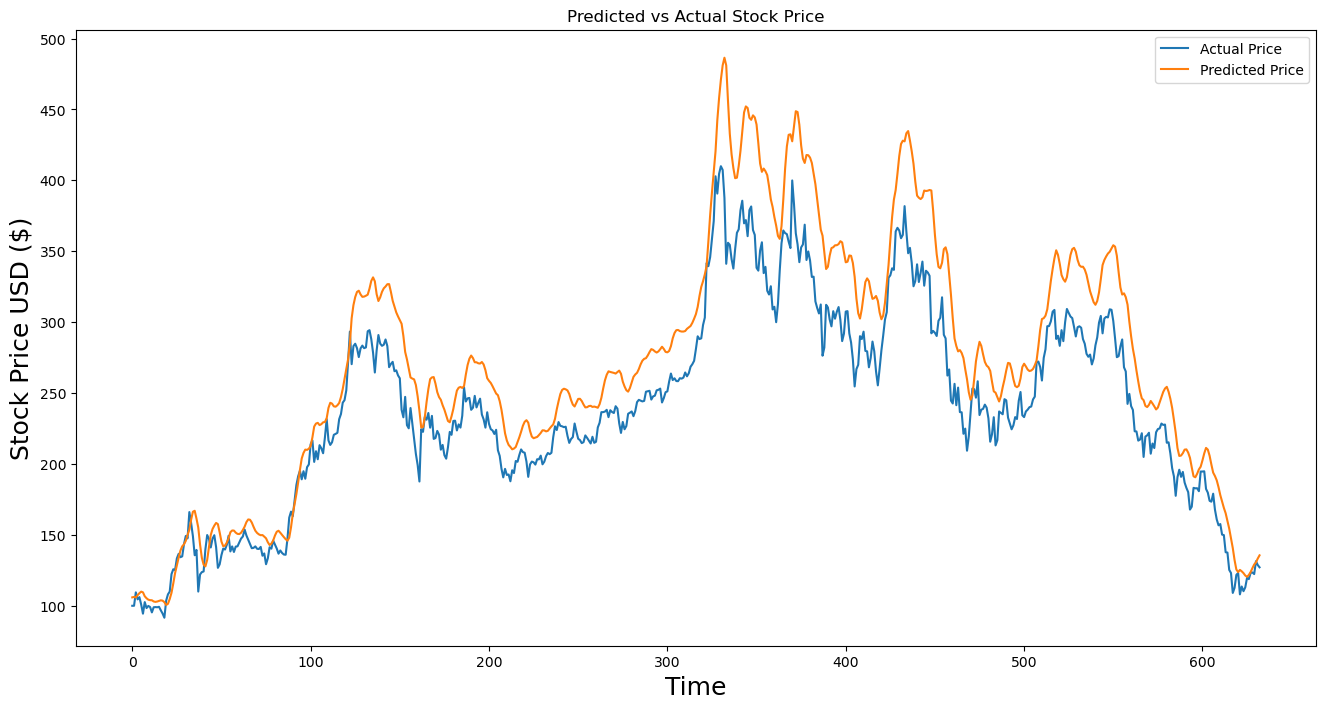

In [18]:
plt.figure(figsize=(16,8))
plt.title('Predicted vs Actual Stock Price')
plt.plot(y_test, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.xlabel('Time', fontsize=18)
plt.ylabel('Stock Price USD ($)', fontsize=18)
plt.legend()
plt.show()

### Thank You